In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()

In [6]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [7]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [8]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


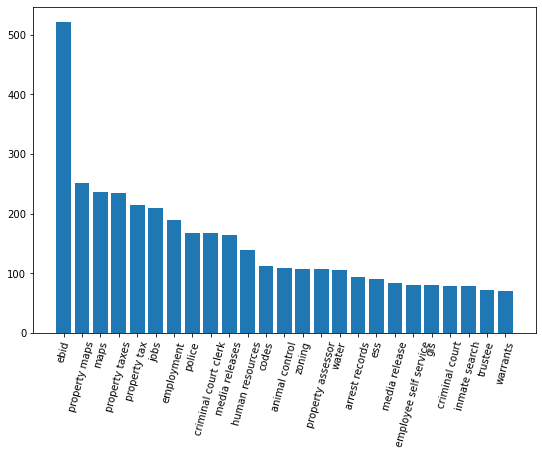

In [9]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);

### **Top 500 Monthly Searches**

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

In [10]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire')

In [11]:
print(response.status_code)

200


In [12]:
fires = response.json()
fires

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

&emsp; Month with the Most Searches

In [13]:
max_response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$order=query_count DESC&$limit=1')

In [14]:
max_response.json()

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'}]

2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

In [15]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&$limit=3000')

In [16]:
queries = response.json()
queries

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [17]:
len(queries)

1262

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [18]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&$where=query_count>100')

In [19]:
codes = response.json()
codes

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [20]:
len(codes)

56

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [21]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000')

In [22]:
all = response.json()

In [23]:
len(all)

43677

In [24]:
map_response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=maps&$limit=50000')

In [25]:
maps = map_response.json()
maps

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [26]:
len(maps)

82

In [27]:
type(maps)

list

In [38]:
map_month_response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$select=month_name, SUM(query_count)&query_text=maps&$group=month_name&$limit=50000')

In [39]:
map_by_month = map_month_response.json()

In [46]:
maps_df = pd.DataFrame(map_by_month)
maps_df = maps_df.rename(columns = {'month_name' : 'Month', 'SUM_query_count' : 'Query Count'})
maps_df

,Month,Query Count
0,April,1309
1,August,991
2,December,556
3,February,832
4,January,924
5,July,1062
6,June,1216
7,March,1090
8,May,1019
9,November,805


In [48]:
#Correcting TypeError: no numeric data to plot
maps_df["Query Count"] = maps_df["Query Count"].astype(int)

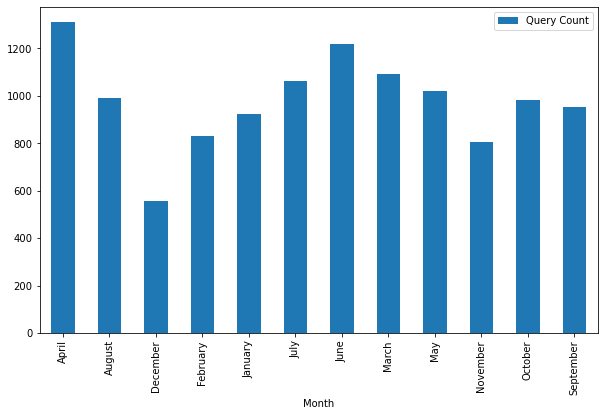

In [49]:
maps_df.plot(kind = 'bar',
             x = 'Month',
             y = 'Query Count',
             figsize = (10,6));

### **hubNashville (311) Service Requests**

5. Make an API request to pull back all the data (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? 

In [82]:
endpoint = 'https://data.nashville.gov/resource/7qhx-rexh.json?$limit=1000000'

In [83]:
response = requests.get(endpoint)

In [84]:
result = response.json()

In [85]:
len(result)

904850

6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.  